# Detecção de anomalias (outliers)

### Exemplo 1.
Utilizar métodos algorítmicos (utilizar dados do sklearn)

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (15, 10)


In [2]:
#dataset
dados, rotulos = make_blobs(n_samples=200, centers=1, n_features=2, random_state=0, center_box=(10,10), cluster_std=3)
dados[:5]

array([[10.13727555,  9.43844845],
       [ 6.188545  , 12.90819012],
       [ 8.84536057, 10.28305477],
       [ 8.47104345,  8.6857771 ],
       [ 8.11573732,  8.55691864]])

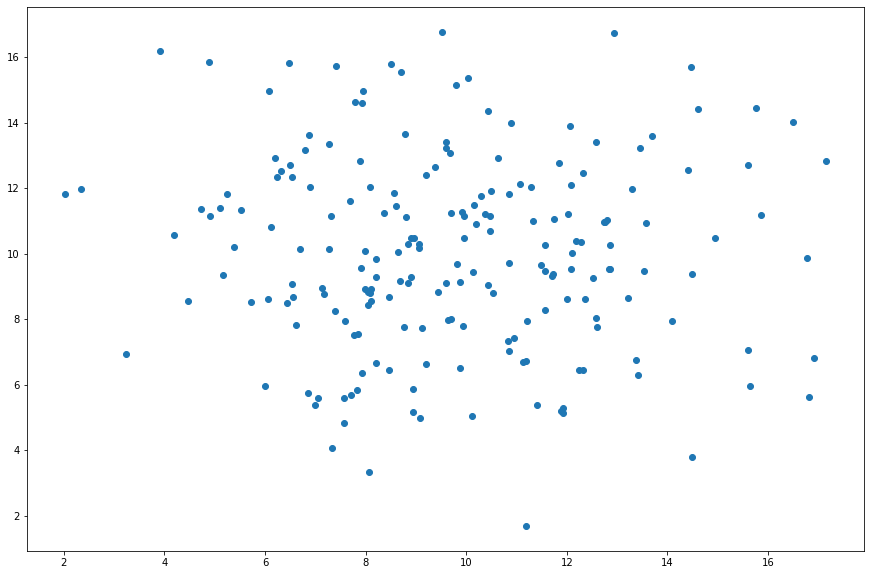

In [3]:
#visualizacao
plt.scatter(dados[:, 0], dados[:, 1])
plt.show()

In [4]:
#definir modelo LOF
k_vizinhos = 20
contaminacao = 0.03
lof = LocalOutlierFactor(n_neighbors=k_vizinhos, contamination=contaminacao)

In [5]:
#predict
predicao = lof.fit_predict(dados)
predicao

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
#set anomalias
lof_indice = np.where(predicao == -1)
anomalias = dados[lof_indice]

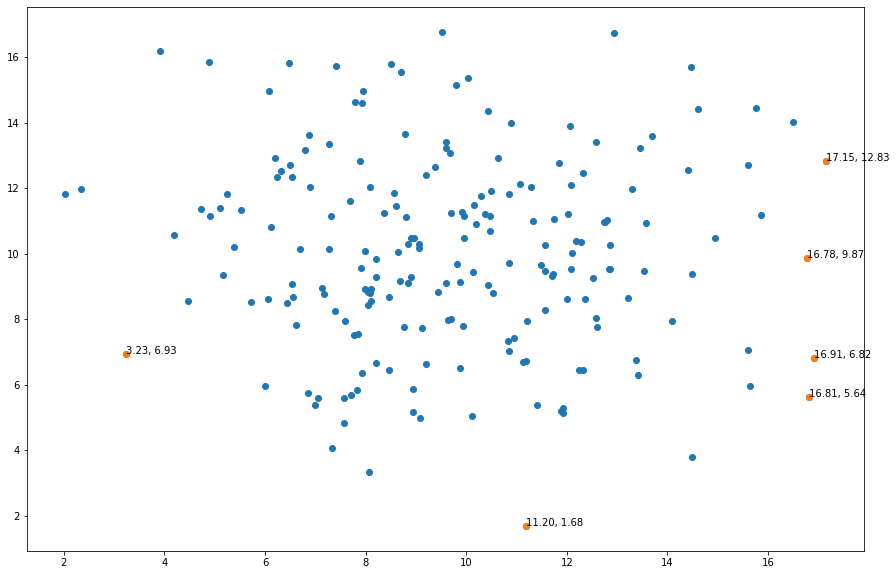

In [7]:
#visualização de anomalias
fig, eixo = plt.subplots()

eixo.scatter(dados[:, 0], dados[:, 1])
eixo.scatter(anomalias[:, 0], anomalias[:, 1])

#rotular anomalias
for i, texto in enumerate(anomalias):
    eixo.annotate('{:.2f}'.format(texto[0])+', '+'{:.2f}'.format(texto[1]), (anomalias[i,0], anomalias[i,1]))

plt.show()

### Exemplo 2.
aplicar métodos estatísticos para detecção de anomalias (utilizar dados do sklearn)

In [8]:
#imports
import plotly.express as pe

from sklearn.datasets import fetch_california_housing

In [9]:
#dataset
data_california = fetch_california_housing(as_frame=True)
moradia = data_california.data
moradia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


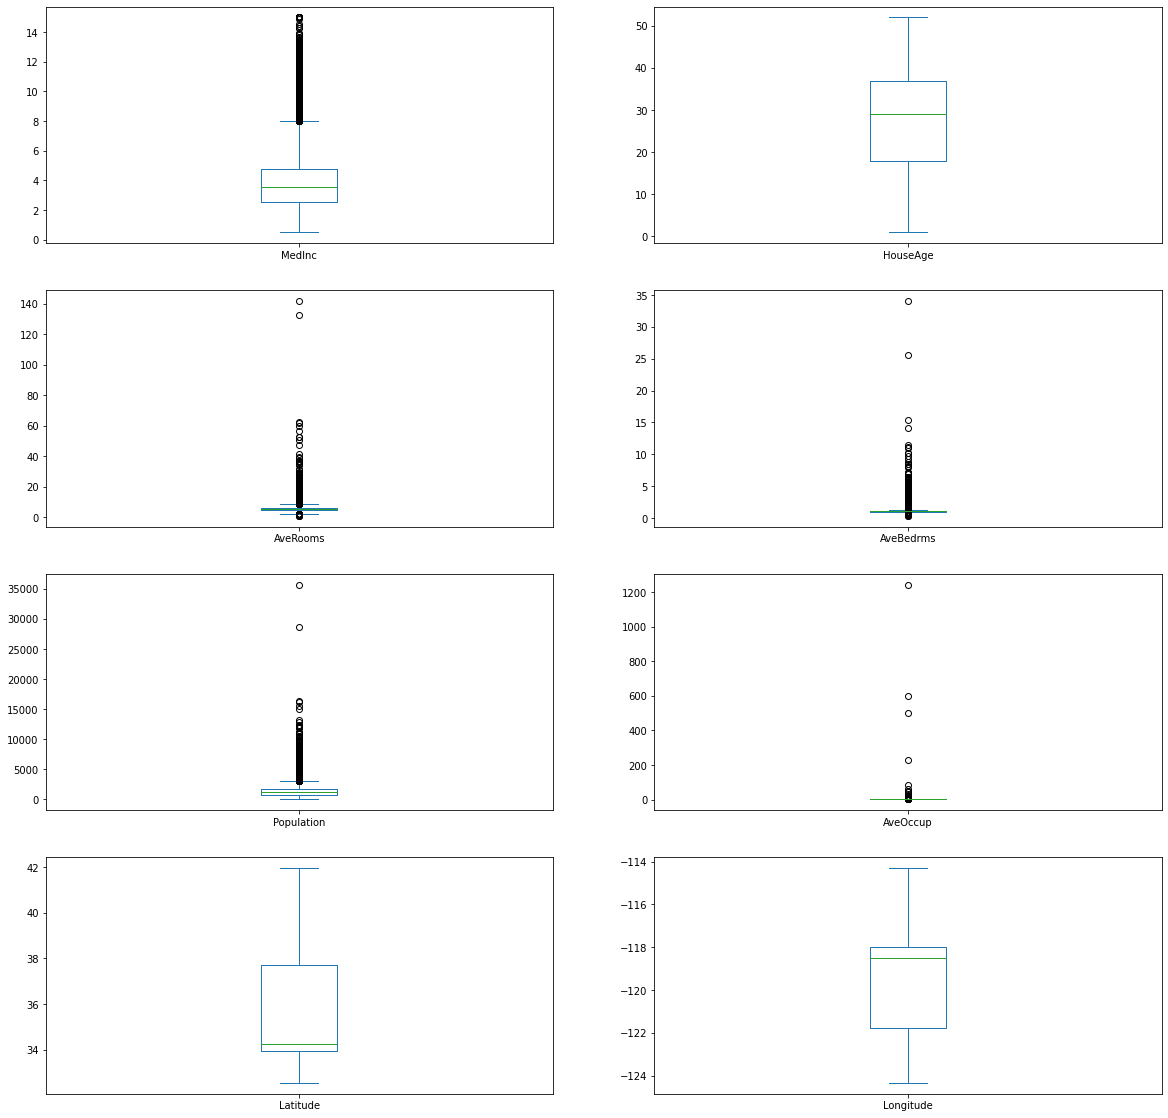

In [10]:
#boxplot
moradia.plot(kind='box', subplots=True, layout=(4, 2), figsize=(20, 20))
plt.show()

In [11]:
#histogram MedInc
fig_renda = pe.histogram(moradia, x='MedInc', marginal='box')
fig_renda.show()

In [12]:
#histogram AveRooms
fig_averooms = pe.histogram(moradia, x='AveRooms', marginal='box')
fig_averooms.show()

In [13]:
#histogram AveBedrooms
fig_avebedrooms = pe.histogram(moradia, x='AveBedrms', marginal='box')
fig_avebedrooms.show()

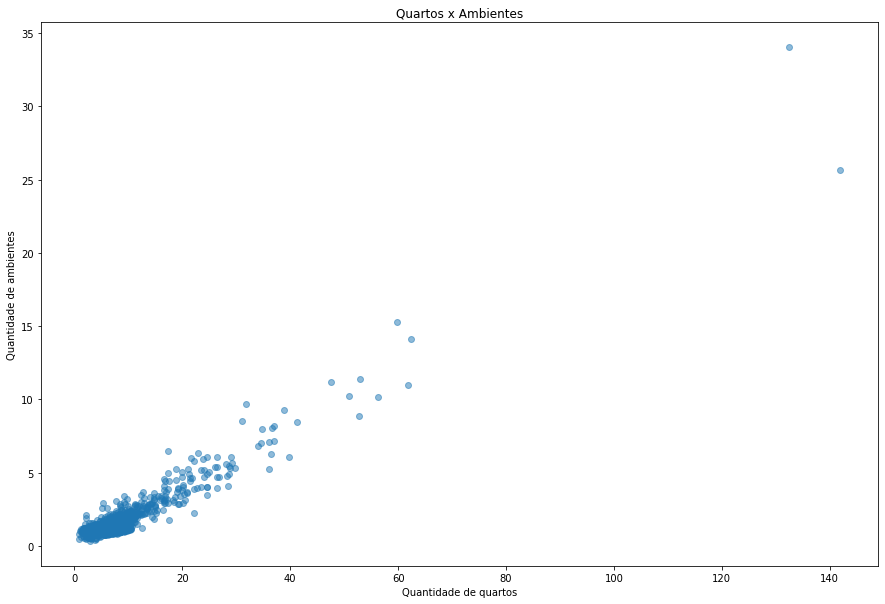

In [14]:
#diagrama de dispersao AveRooms x AveBedRooms
plt.scatter(moradia['AveRooms'], moradia['AveBedrms'], alpha=0.5)
plt.xlabel('Quantidade de quartos')
plt.ylabel('Quantidade de ambientes')
plt.title('Quartos x Ambientes')
plt.show()

In [15]:
#analise de limites e deteccao de outliers em Population
#quartis
q1 = moradia['Population'].quantile(0.25)
q3 = moradia['Population'].quantile(0.75)

#range
range_interquartil = q3 - q1

#limiares
k = 1.5
lim_inf = q1 - (range_interquartil * k)
lim_sup = q3 + (range_interquartil * k)
print('q1:{} \nq3:{} \nrange:{} \nlim_inf:{} \nlim_sup:{}'.format(q1, q3, range_interquartil, lim_inf, lim_sup))


q1:787.0 
q3:1725.0 
range:938.0 
lim_inf:-620.0 
lim_sup:3132.0


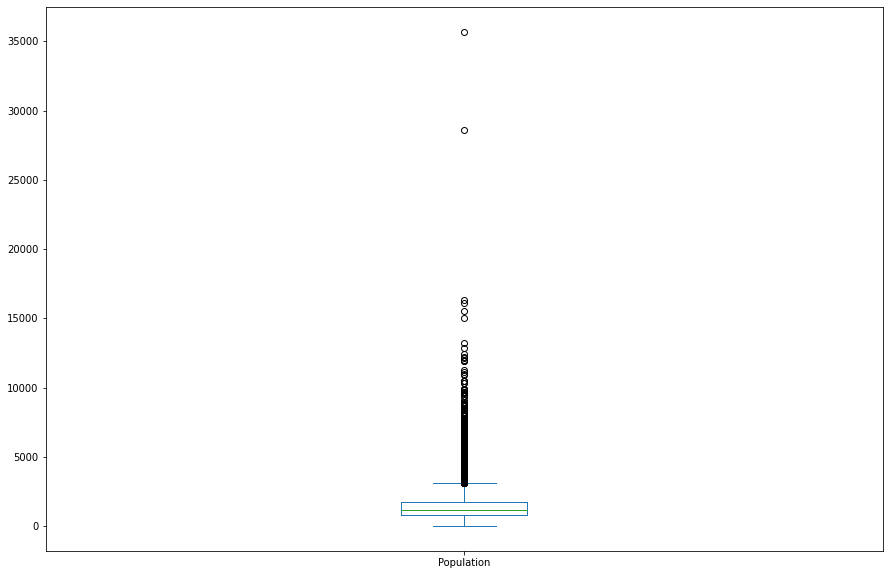

In [16]:
#boxplot
moradia['Population'].plot(kind='box')
plt.show()

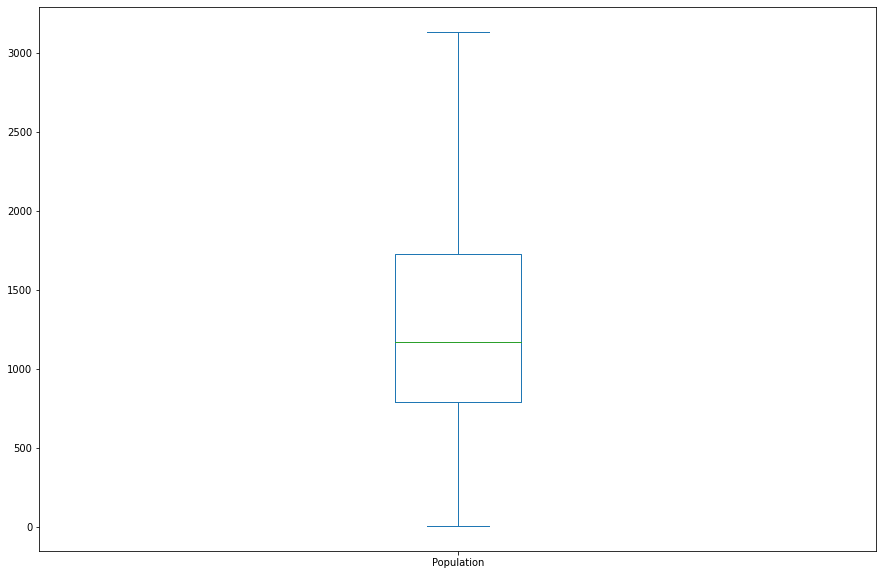

In [17]:
#boxplot sem anomalias
moradia['Population'].plot(kind='box', showfliers=False)
plt.show()

### Exemplo 3.
Use o algoritmo Fator Local de Anomalia (LOF - Local Outlier Factor) e o diagrama de caixa
para fazer a detecção de anomalias de uma base de dados que contém as negociações de ações da
Petrobrás (PETR4) no período entre novembro de 2019 e abril de 2020.

    A. Na análise com o LOF, gere um gráfico de dispersão, plotando as anomalias com uma cor
    diferente dos dados normais. Para a análise, use os atributos Close e Open. Use o parâmetro
    k-vizinhos = 20. Não precisa definir valor para o parâmetro contamination. Dica: insira
    rótulos nas anomalias para ver suas datas.

    B. Em seguida, calcule os limites inferior e superior dos atributos Close, Open e Volume (use
    o parâmetro sigma = 1.5) e gere os diagramas de caixa dos três atributos.


Ações da PETR4 - 11/2019 a 04/2020: http://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/petr4-nov-19-abr-20.csv

#### A.

In [18]:
url = 'http://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/petr4-nov-19-abr-20.csv'
df = pd.read_csv(url, index_col=0, parse_dates=True)           #indexar por data
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,30.590000,31.230000,29.840000,30.430000,24.232862,101210200
2019-11-04,30.889999,31.219999,29.959999,30.360001,24.177118,81023400
2019-11-05,30.410000,30.600000,29.580000,29.650000,23.611712,92980900
2019-11-06,30.049999,30.700001,28.100000,29.709999,23.659489,154003100
2019-11-07,30.000000,31.070000,29.540001,30.900000,24.607145,96329000


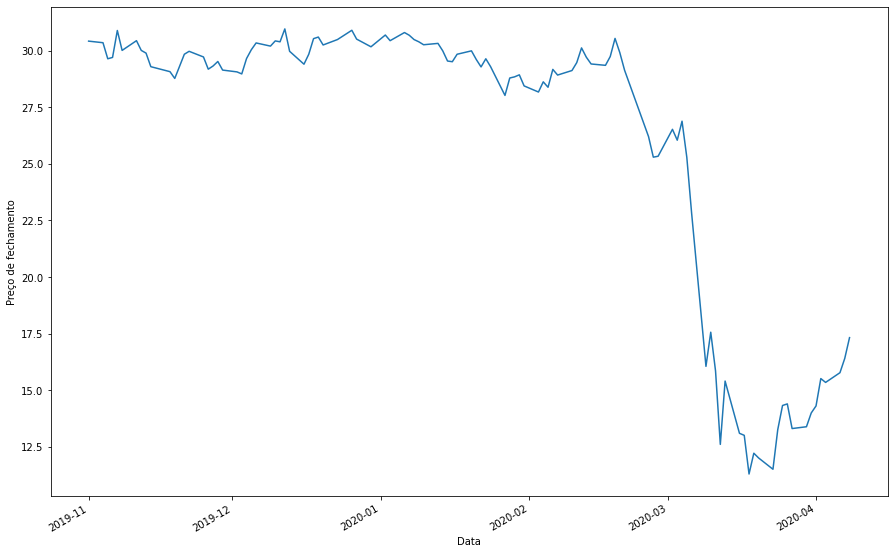

In [19]:
#visualizacao dos dados por data
df['Close'].plot()
plt.xlabel('Data')
plt.ylabel('Preço de fechamento')
plt.show()

In [20]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2019-11-01 to 2020-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       106 non-null    float64
 1   High       106 non-null    float64
 2   Low        106 non-null    float64
 3   Close      106 non-null    float64
 4   Adj Close  106 non-null    float64
 5   Volume     106 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.8 KB


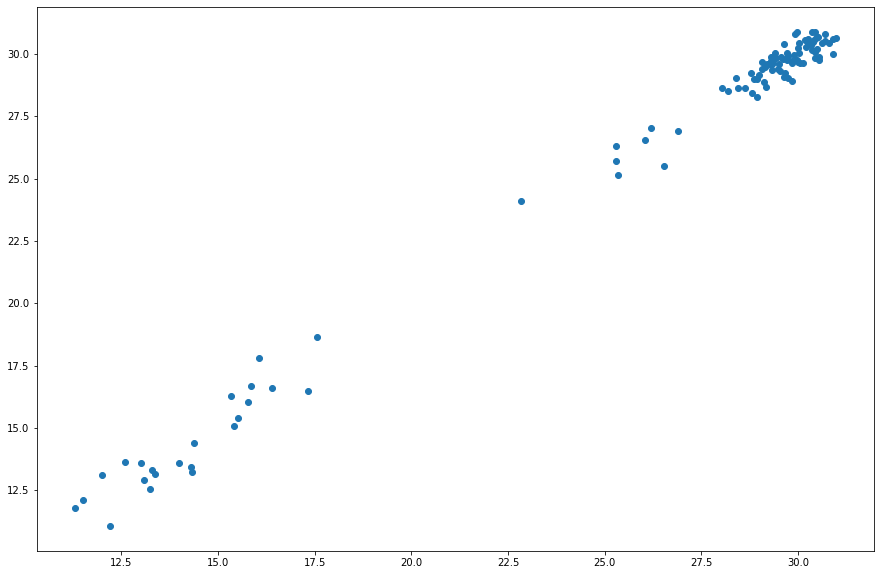

In [21]:
#primeira visualizacao
plt.scatter(df['Close'], df['Open'])
plt.show()

In [22]:
#definir modelo LOF
k_vizinhos = 20
lof = LocalOutlierFactor(n_neighbors=k_vizinhos)

#predict
df_predict = df[['Close', 'Open']]
predicao = lof.fit_predict(df_predict)
predicao

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1])

In [23]:
#extrair anomalias
lof_indice = np.where(predicao == -1)
anomalias = df_predict.iloc[lof_indice]

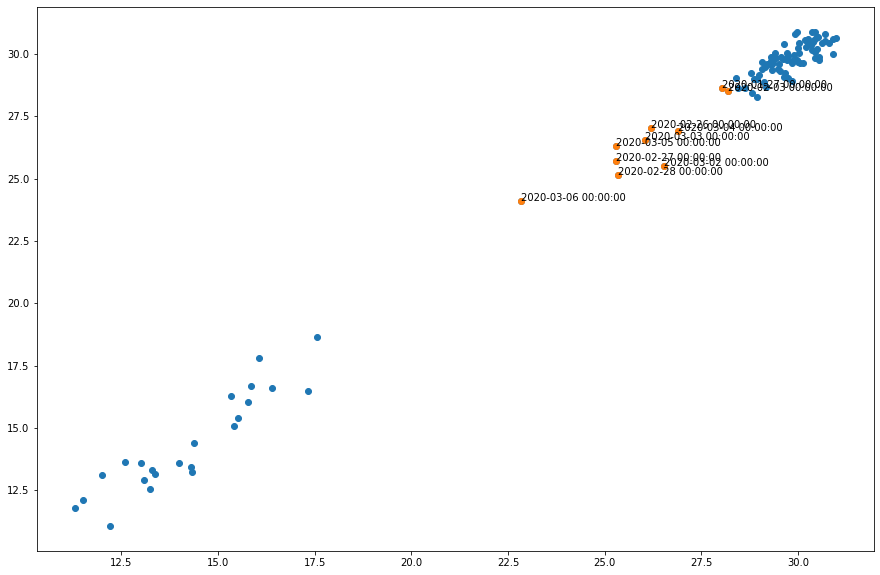

In [24]:
#plotar anomalias
fig, eixo = plt.subplots()

eixo.scatter(df['Close'], df['Open'])
eixo.scatter(anomalias['Close'], anomalias['Open'])

data_anomalias = df.index[lof_indice]

for i, texto in enumerate(data_anomalias):
    eixo.annotate(texto, (anomalias.iloc[i]['Close'], anomalias.iloc[i]['Open']))

plt.show()

In [25]:
data_anomalias

DatetimeIndex(['2020-01-27', '2020-02-03', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

#### B.

In [28]:
q1_open = df['Open'].quantile(0.25)
q3_open = df['Open'].quantile(0.75)
range_open = q1_open - q3_open

sigma = 1.5

lim_inf_open = q1_open - (range_open * sigma)
lim_sup_open = q3_open + (range_open * sigma)

print('q1 Open:{} \nq3 Open:{} \nrange Open:{} \nlim_inf Open:{} \nlim_sup Open:{}'.format(q1_open, q3_open, range_open, lim_inf_open, lim_sup_open))

q1 Open:25.87249925 
q3 Open:30.049999 
range Open:-4.177499749999999 
lim_inf Open:32.138748875 
lim_sup Open:23.783749375


<function matplotlib.pyplot.show(close=None, block=None)>

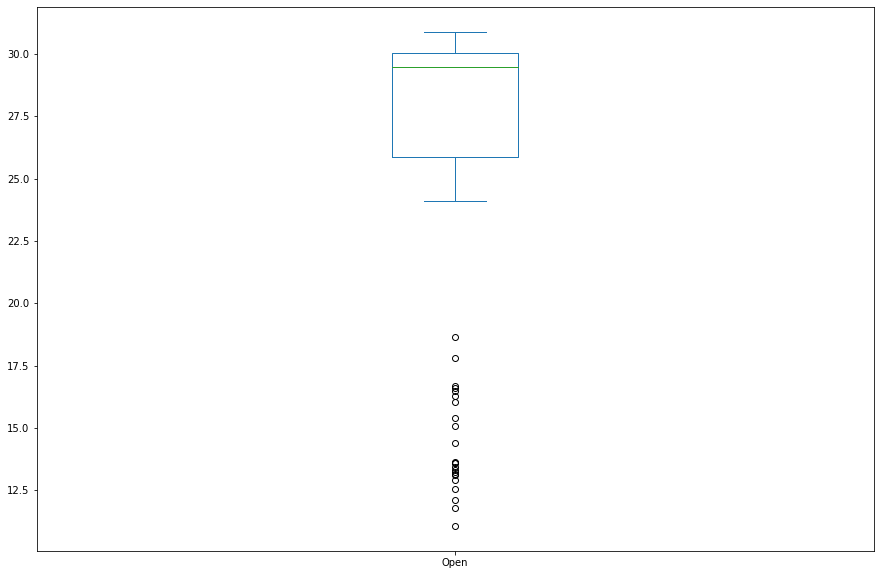

In [31]:
df['Open'].plot(kind='box')
plt.show

In [27]:
q1_close = df['Close'].quantile(0.25)
q3_close = df['Close'].quantile(0.75)
range_close = q1_close - q3_close

sigma = 1.5

lim_inf_close = q1_close - (range_close * sigma)
lim_sup_close = q3_close + (range_close * sigma)

print('q1 Close:{} \nq3 Close:{} \nrange Close:{} \nlim_inf Close:{} \nlim_sup Close:{}'.format(q1_close, q3_close, range_close, lim_inf_close, lim_sup_close))

q1 Close:25.51749975 
q3 Close:30.04249925 
range Close:-4.5249995 
lim_inf Close:32.304998999999995 
lim_sup Close:23.255


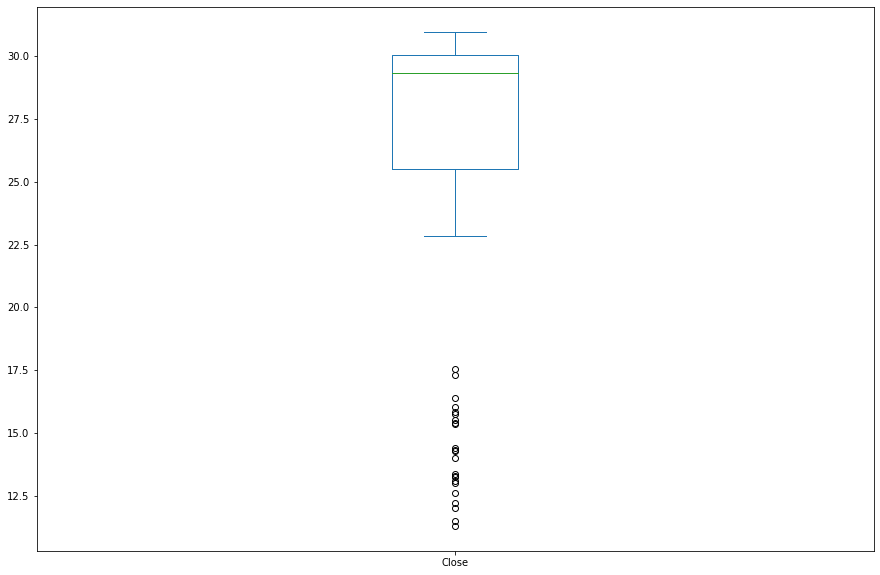

In [33]:
df['Close'].plot(kind='box')
plt.show()

In [29]:
q1_vol = df['Volume'].quantile(0.25)
q3_vol = df['Volume'].quantile(0.75)
range_vol = q1_vol - q3_vol

sigma = 1.5

lim_inf_vol = q1_vol - (range_vol * sigma)
lim_sup_vol = q3_vol + (range_vol * sigma)

print('q1 Volume:{} \nq3 Volume:{} \nrange Volume:{} \nlim_inf Volume:{} \nlim_sup Volume:{}'.format(q1_vol, q3_vol, range_vol, lim_inf_vol, lim_sup_vol))

q1 Volume:37563400.0 
q3 Volume:101356975.0 
range Volume:-63793575.0 
lim_inf Volume:133253762.5 
lim_sup Volume:5666612.5


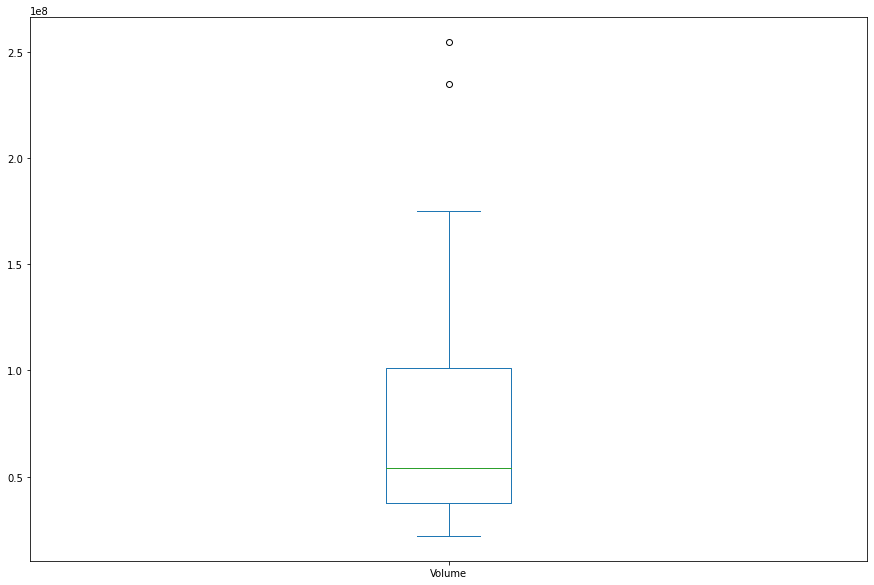

In [35]:
df['Volume'].plot(kind='box')
plt.show()